<a href="https://colab.research.google.com/github/J815/Text-image-genenration-/blob/main/text_to_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers scipy ftfy
!pip install diffusers
!pip install "ipywidgets>=7,<8"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 70.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 85.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 604.0/604.0 KB 39.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
!pip install accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 18.7 MB/s eta 0:00:00


In [ ]:
import torch 
from diffusers import StableDiffusionPipeline
pipeli=StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4",revision="fp16",torch_dtype=torch.float16)

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

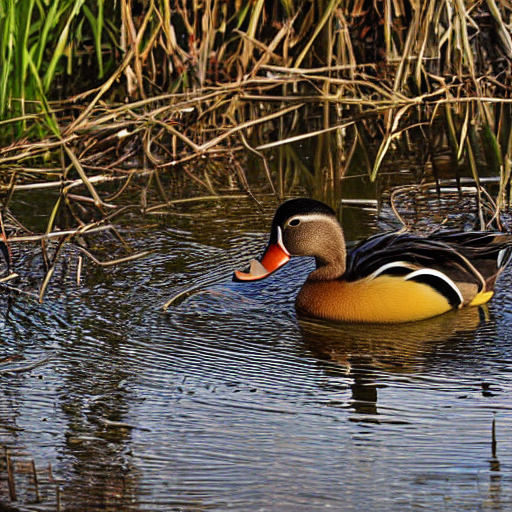

In [ ]:

pipeli=pipeli.to("cuda")
from torch import autocast 
prompt="a photograph of a duck in pond"
with autocast("cuda"):
   img1=pipeli(prompt).images[0]
img1

  0%|          | 0/50 [00:00<?, ?it/s]

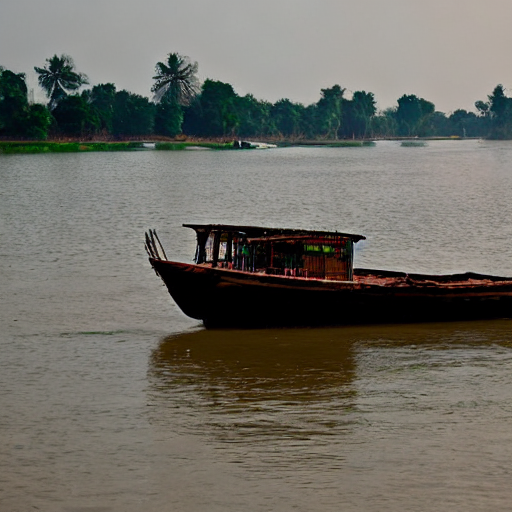

In [ ]:
prompt="a photograph of boat in bangladesh"
with autocast("cuda"):
   img2=pipeli(prompt).images[0]
img2

In [ ]:
from IPython.display import Image
s=Image('/content/drive/MyDrive/boat.jpg')

In [ ]:
 from fid_score.fid_score import FidScore
paths=["s","img2"]
fid=FidScore(paths,"cuda")

In [ ]:
res

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 512x512 4 persons, 1 boat, 2 birds
Speed: 32.8ms pre-process, 57.5ms inference, 37.3ms NMS per image at shape (1, 3, 640, 640)